# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename) # YOUR CODE HERE

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>

1. The adult census data from 1994
2. We will be predicting wether or not an individual adult has income_binary or <=50K or >50K.
3. This is a supervised learning problem. It is a binary classification problem because there are two outcomes for the label thats being predicted (<=50K or >50K). We will be using  logistic regression in order to classify the predictions.
4. The features we will be using (so far) will be age, education, occupation, and hours per week.
5. This is an important problem because it allows us to see the relationship between a persons education, field they work in, and their age, race, and sexselfID and maps it to their income level. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
# We created dataframes for features and label
X = df[['age', 'education-num', 'workclass', 'race', 'sex_selfID', 'hours-per-week']]
y = df['income_binary']

In [4]:
# Checking for null values
X.isnull().sum()
X.dropna(inplace=True)
X.isnull().sum()

/tmp/ipykernel_2275/1372785344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


age               0
education-num     0
workclass         0
race              0
sex_selfID        0
hours-per-week    0
dtype: int64

In [5]:
X.head()
print(X['race'].unique())
print(X['race'].nunique())

print(X['workclass'].unique())
print(X['workclass'].nunique())

print(X['sex_selfID'].unique())
print(X['sex_selfID'].nunique())

['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Inuit' 'Other']
5
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
8
['Non-Female' 'Female']
2


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>

1. After performing exploratory data analysis, I updated the feature list based on data availability and relevance to the income prediction task. The features I have selected I have selected to use for modeling are age, education-num, workclass, race, sex_selfID, and hours-per-week. These features were selected because they represent a mix of demographic and employment related variables that can help predict whether someone earns more than or less than $50K annually. I removed other columns like "fnlwgt" and "native-country" because they were harder to interpret and added too much complexity for the project.
2. To prepare the data for modeling, I will use several preprocessing techniques. First, I have already checked for missing values and dropped any rows that had them. Then, I plan to use one-hot encoding to convert the categorical features like workclass, race, and sex_selfID into numerical format since machine learning models work best with numbers. After that, I will scale the numerical features like age, education-num, and hours-per-week using standardization so that no feature dominates just because it has a larger scale.
3. For the model, I will use Logistic Regression, which is a good starting point for binary classification problems. It’s a simple and interpretable model that works well when the relationship between features and the target variable is mostly linear.
4. To train the model, I will split the data into a training set and a test set. I will train the model on the training data and then test it on the unseen test data to see how well it performs. I will also evaluate the model using accuracy, precision, recall, and the F1-score since those are common metrics for binary classification. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [6]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [7]:
# I dropped rows with missing values from the full DataFrame first and the seperated the features and target. The target label is income_binary, which represents whether the individual's income is <=50K or >50K.

df_clean = df.dropna()

features = ['age', 'education-num', 'workclass', 'race', 'sex_selfID', 'hours-per-week']
X = df_clean[features]
y = df_clean['income_binary']

In [8]:
# I applied StandardScaler to the numerical features and OneHotEncoder to the categorical ones to ensure that all features are on a comparable scale and that categorical features are handled correctly.

categorical_cols = ['workclass', 'race', 'sex_selfID']
numerical_cols = ['age', 'education-num', 'hours-per-week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [9]:
# Using LogisticRegression as the classification model, I built the pipeline that combines preprocessing and modeling steps.

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

In [10]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Fitting the model

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7370723499719574
              precision    recall  f1-score   support

       <=50K       0.89      0.74      0.81      6642
        >50K       0.49      0.73      0.59      2273

    accuracy                           0.74      8915
   macro avg       0.69      0.74      0.70      8915
weighted avg       0.79      0.74      0.75      8915



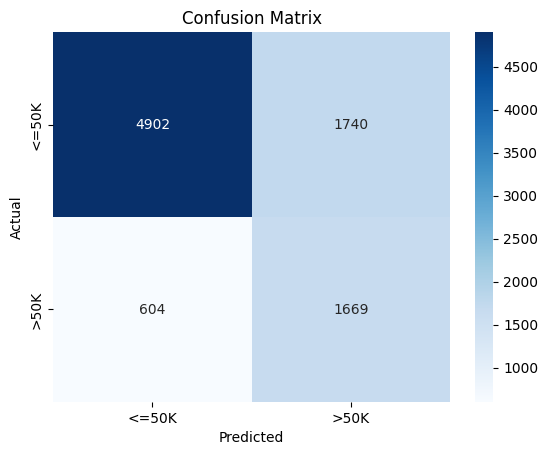

In [12]:
# Confusion matrix visualization

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7776780706674145
              precision    recall  f1-score   support

       <=50K       0.82      0.89      0.86      6642
        >50K       0.58      0.44      0.50      2273

    accuracy                           0.78      8915
   macro avg       0.70      0.67      0.68      8915
weighted avg       0.76      0.78      0.77      8915



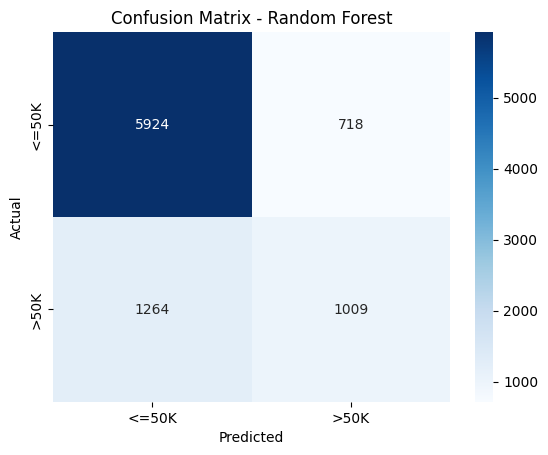

In [16]:
# Confusion matrix visualization
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

<My Results>

In this project, I worked with the Adult Census Income dataset to build a machine learning model that predicts whether a person earns more or less than $50K per year. I followed the machine learning life cycle, starting by exploring the data and choosing relevant features like age, education level, hours worked per week, workclass, race, and sex. I cleaned the data by dropping missing values and used one-hot encoding and scaling to prepare it for modeling. I started with a Logistic Regression model, which gave me an accuracy of about 74 percent. The model did well in predicting people earning less than or equal to $50K but had trouble with those earning more than $50K. To improve performance, I tried using a Random Forest classifier, which slightly increased the accuracy to around 78 percent. While this model performed better on people with higher incomes, the results still showed some imbalance. A future improvement would include handeling class imbalance more effectively to help the model better predict individuals earning over $50K. Overall, I learned how important data preprocessing, feature selection, and model evaluation are in building a reliable machine learning model. This project helped me understand how machine learning can be used to make predictions based on real-world data and gave me hands-on experience with the tools and techniques used in this process. 